# Tuning Results Evaluation

In [3]:
%load_ext autoreload
%autoreload 2

import subprocess
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

from src.eda import EDA
eda = EDA()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
from tbparse import SummaryReader
import os

log_dir = 'tune_runs'
run_dir = os.path.join(log_dir, 'train_fashion_mnist_2023-08-18_11-44-40')

reader = SummaryReader(run_dir, pivot=True, extra_columns={'dir_name'}) # long format
df = reader.scalars
df

,step,ray/tune/done,ray/tune/iterations_since_restore,ray/tune/mean_accuracy,ray/tune/mean_val_loss,ray/tune/time_since_restore,ray/tune/time_this_iter_s,dir_name
0,1,0.0,1.0,0.674000,1.107052,30.381824,30.381824,train_fashion_mnist_da3d0_00000_0_batch_size=6...
1,2,0.0,2.0,0.744583,0.709797,49.579380,19.197556,train_fashion_mnist_da3d0_00000_0_batch_size=6...
2,3,0.0,3.0,0.780667,0.623169,74.478310,24.898928,train_fashion_mnist_da3d0_00000_0_batch_size=6...
3,4,0.0,4.0,0.792250,0.581268,98.265358,23.787050,train_fashion_mnist_da3d0_00000_0_batch_size=6...
4,5,0.0,5.0,0.801750,0.549189,120.452461,22.187101,train_fashion_mnist_da3d0_00000_0_batch_size=6...
...,...,...,...,...,...,...,...,...
230,6,0.0,6.0,0.504083,1.869219,166.244675,15.949316,train_fashion_mnist_da3d0_00019_19_batch_size=...
231,7,0.0,7.0,0.558583,1.686488,181.695251,15.450581,train_fashion_mnist_da3d0_00019_19_batch_size=...
232,8,0.0,8.0,0.642833,1.480923,196.425827,14.730574,train_fashion_mnist_da3d0_00019_19_batch_size=...
233,9,0.0,9.0,0.680917,1.292855,210.252228,13.826403,train_fashion_mnist_da3d0_00019_19_batch_size=...


In [61]:
import numpy as np
import re

def mean(x):
    return np.array(x).mean()

def get_param_from_dir_name(dirname, param):
    pattern = f'{param}=(\d+(\.\d+)?)'
    match = re.search(pattern, dirname)

    if match:
        res = float(match.group(1))
        return res
    else:
        print(f'{param} not found in the string.')

df['loss'] = df.apply(lambda x: mean(x['ray/tune/mean_val_loss']), axis=1)
df['accuracy'] = df.apply(lambda x: mean(x['ray/tune/mean_accuracy']), axis=1)
df['batch_size'] = df.apply(lambda x: get_param_from_dir_name(x['dir_name'], 'batch_size'), axis=1)
df['epochs'] = df.apply(lambda x: get_param_from_dir_name(x['dir_name'], 'epochs'), axis=1)
df['learning_rate'] = df.apply(lambda x: get_param_from_dir_name(x['dir_name'], 'learning_rate'), axis=1)

df = df[['step', 'loss', 'accuracy', 'batch_size', 'epochs', 'learning_rate', 'dir_name']]
df

,step,loss,accuracy,batch_size,epochs,learning_rate,dir_name
0,1,1.107052,0.674000,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
1,2,0.709797,0.744583,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
2,3,0.623169,0.780667,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
3,4,0.581268,0.792250,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
4,5,0.549189,0.801750,64.0,10.0,0.0024,train_fashion_mnist_da3d0_00000_0_batch_size=6...
...,...,...,...,...,...,...,...
230,6,1.869219,0.504083,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...
231,7,1.686488,0.558583,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...
232,8,1.480923,0.642833,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...
233,9,1.292855,0.680917,64.0,10.0,0.0002,train_fashion_mnist_da3d0_00019_19_batch_size=...


Text(0.5, 1.0, 'run0')

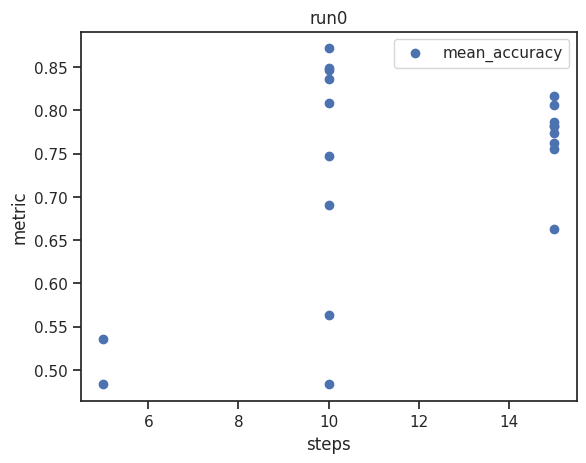

In [94]:
df_last = df.drop_duplicates(subset='dir_name', keep='last')

plt.scatter(df_last['epochs'], df_last['accuracy'])
plt.xlabel('steps')
plt.ylabel('metric')
plt.legend(['mean_accuracy', 'mean_val_loss'])
plt.title('run0')

/home/lena/git/shoe-tuning/.env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


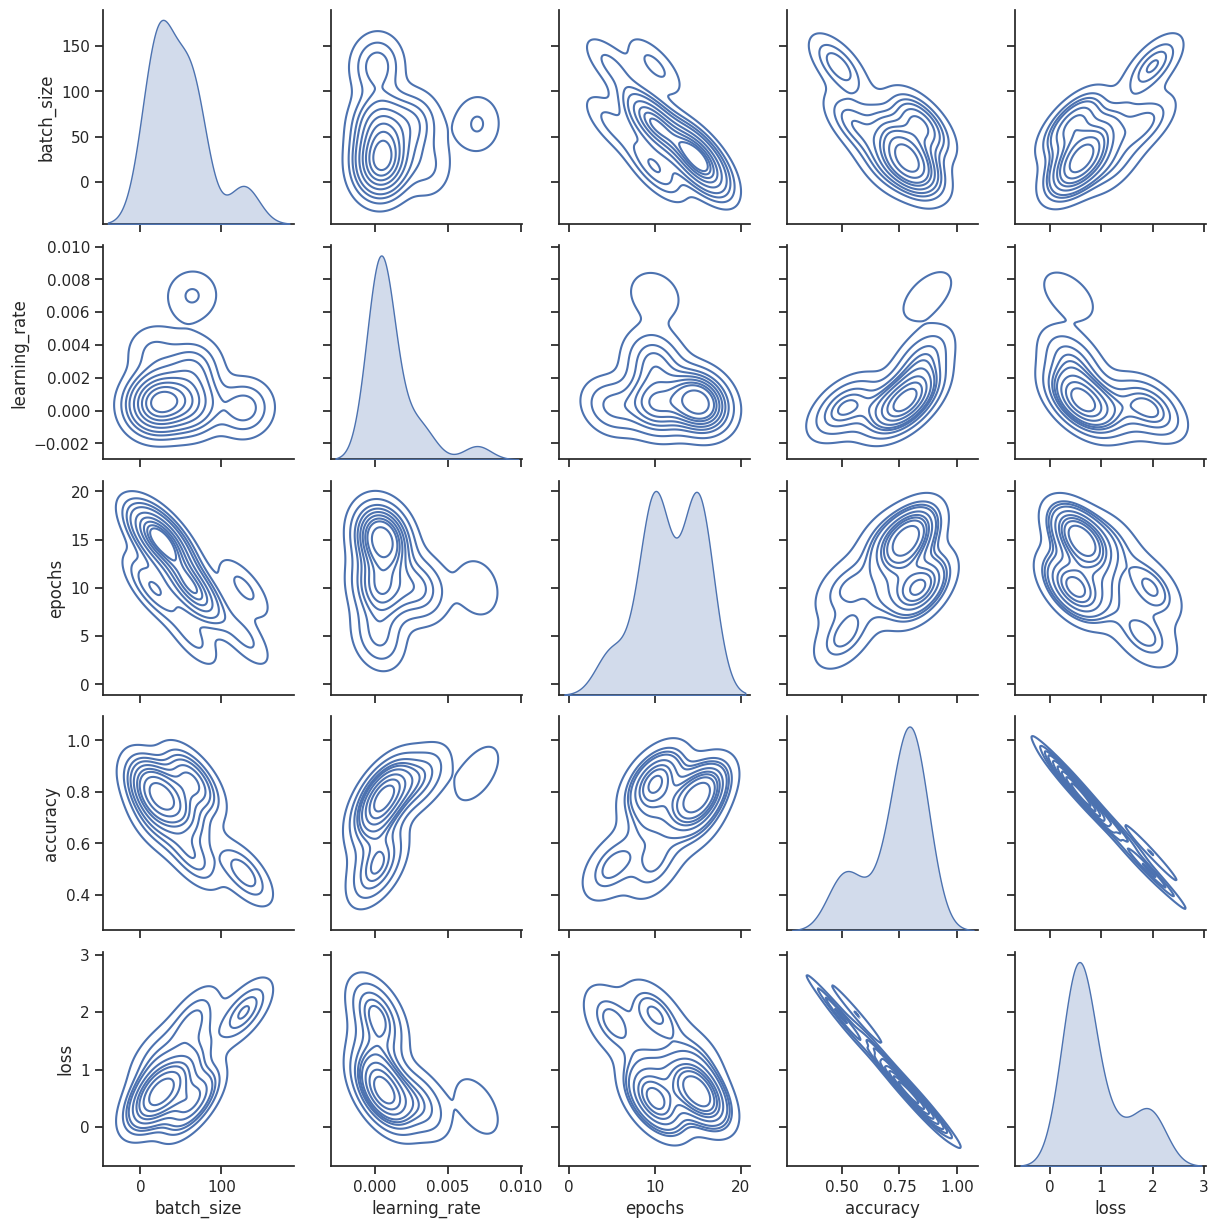

In [103]:
import seaborn as sns

df_heat = df_last[['batch_size', 'learning_rate', 'epochs', 'accuracy', 'loss']]
# Create a heatmap-style scatter matrix using Seaborn
sns.pairplot(df_heat, kind='kde', diag_kind='kde')

<Axes: xlabel='batch_size', ylabel='learning_rate'>

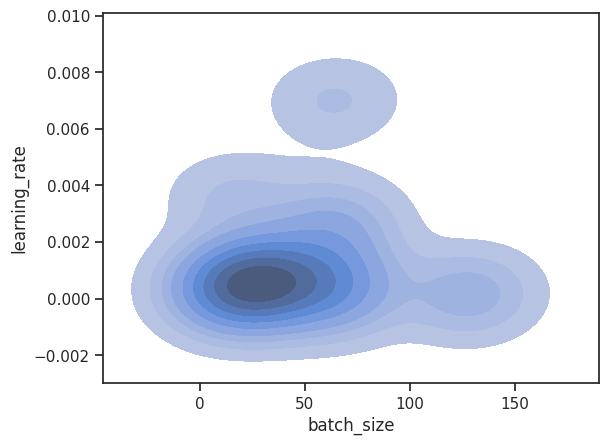

In [88]:
sns.kdeplot(
    data=df_heat, x="batch_size", y="learning_rate", fill=True
)

<Axes: xlabel='batch_size', ylabel='learning_rate'>

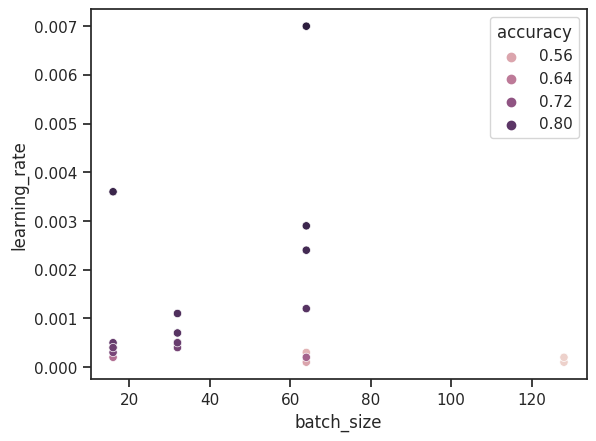

In [107]:
sns.scatterplot(data=df_heat, x="batch_size", y="learning_rate", hue="accuracy")

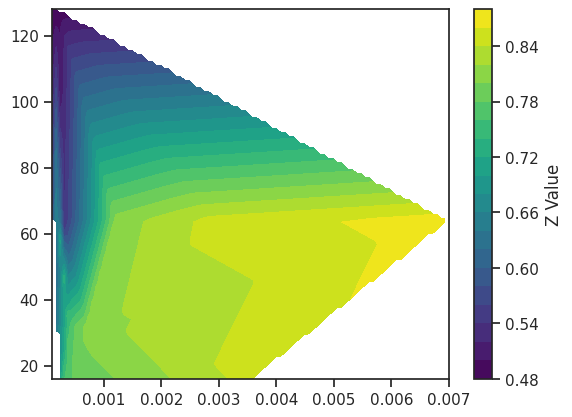

In [99]:
from scipy.interpolate import griddata

# Create a grid for interpolation
def plot(x, y, z):
    x_grid, y_grid = np.meshgrid(np.linspace(min(x), max(x), 100), np.linspace(min(y), max(y), 100))

    # Interpolate z values onto the grid
    z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

    plt.contourf(x_grid, y_grid, z_grid, levels=20, cmap='viridis')
    plt.colorbar(label='Z Value')

plot(df_heat['learning_rate'], df_heat['batch_size'], df_heat['accuracy'])